In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Fthiotidas_T'
raceDate = '1/7/2023'
surface = 'Tarmac'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/84298-rally-fthiotidos-day-1-2023/?s='
startat, no_ss=426707, int(4)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Anapoliotakis,C1,15:41.22,-,116.1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,1
1,2,#4,Papadimitriou,C1,15:58.54,+17.32 + 17.32,114.0 0.57,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,2
2,3,#3,Aligizakis E.,C1,16:01.56,+20.34 + 3.02,113.6 0.67,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,3
3,4,#5,Kampilis Panag,C1,16:28.99,+47.77 + 27.43,110.5 1.57,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,4
4,5,#9,Koukeas Efstat,C1,16:29.01,+47.79 + 0.02,110.5 1.57,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,39,#102,Stafilopatis M,4 2000+,9:06.18,+2:14.68 + 1.37,72.0 12.3,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,39
39,40,#110,Georgakopoulos,4 -1600,9:15.10,+2:23.60 + 8.92,70.8 13.2,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,40
40,41,#115,Mitropoulos Ko,2 2000,9:28.74,+2:37.24 + 13.64,69.1 14.4,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,41
41,42,#35,Manouskos Niko,C6 F2,10:56.45,+4:04.95 + 1:27.71,59.9 22.4,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,42


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Anapoliotakis,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,1,941.22
1,Papadimitriou,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,2,958.54
2,Aligizakis E.,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,3,961.56
3,Kampilis Panag,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,4,988.99
4,Koukeas Efstat,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,5,989.01
...,...,...,...,...,...,...,...,...,...
38,Stafilopatis M,4 2000+,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,39,546.18
39,Georgakopoulos,4 -1600,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,40,555.10
40,Mitropoulos Ko,2 2000,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,41,568.74
41,Manouskos Niko,C6 F2,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,42,656.45


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race         ss          
Fthiotidas_T 1     941.22
             2     407.56
             3     941.20
             4     411.50

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Anapoliotakis,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,1,941.22,941.22,0.00,0.000000,01
1,Papadimitriou,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,2,958.54,941.22,17.32,1.840165,01
2,Aligizakis E.,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,3,961.56,941.22,20.34,2.161025,01
3,Kampilis Panag,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,4,988.99,941.22,47.77,5.075328,01
4,Koukeas Efstat,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,5,989.01,941.22,47.79,5.077453,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Stafilopatis M,4 2000+,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,39,546.18,411.50,134.68,32.729040,04
179,Georgakopoulos,4 -1600,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,40,555.10,411.50,143.60,34.896719,04
180,Mitropoulos Ko,2 2000,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,41,568.74,411.50,157.24,38.211422,04
181,Manouskos Niko,C6 F2,4,Fthiotidas_T,1/7/2023,Tarmac,Championship,42,656.45,411.50,244.95,59.526124,04


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Anapoliotakis,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,1,941.22,941.22,0.00,0.000000,01
1,Papadimitriou,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,2,958.54,941.22,17.32,1.840165,01
2,Aligizakis E.,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,3,961.56,941.22,20.34,2.161025,01
3,Kampilis Panag,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,4,988.99,941.22,47.77,5.075328,01
4,Koukeas Efstat,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,5,989.01,941.22,47.79,5.077453,01
8,Peroulakis Geo,C2,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,9,992.65,941.22,51.43,5.464185,01
9,Argiriou Giorg,C2,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,10,1001.02,941.22,59.80,6.353456,01
10,Gerodimos Gior,C2,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,11,1003.56,941.22,62.34,6.623319,01
17,Kazanas Dimitr,C2,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,18,1062.83,941.22,121.61,12.920465,01
20,Nomikos Ioanni,C1,1,Fthiotidas_T,1/7/2023,Tarmac,Championship,21,1070.96,941.22,129.74,13.784237,01


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Fthiotidas_T                       
SS.                      01     02       03     04
Crew                                              
Aligizakis E.         20.34   5.30     5.81  22.63
Anapoliotakis          0.00   0.00     6.68   3.60
Argiriou Giorg        59.80  25.84   458.35  66.94
Bistas Ioannis       543.20  50.66   128.14  44.74
Gerodimos Gior        62.34  31.41    59.05  29.25
Kampilis Panag        47.77  25.62      NaN    NaN
Kazanas Dimitr       121.61  43.73   107.08  54.31
Koukeas Efstat        47.79  14.00  1125.46  17.54
Nomikos Ioanni       129.74  44.58      NaN    NaN
Papadimitriou         17.32   8.28     0.00   0.00
Peroulakis Geo        51.43  13.44      NaN    NaN

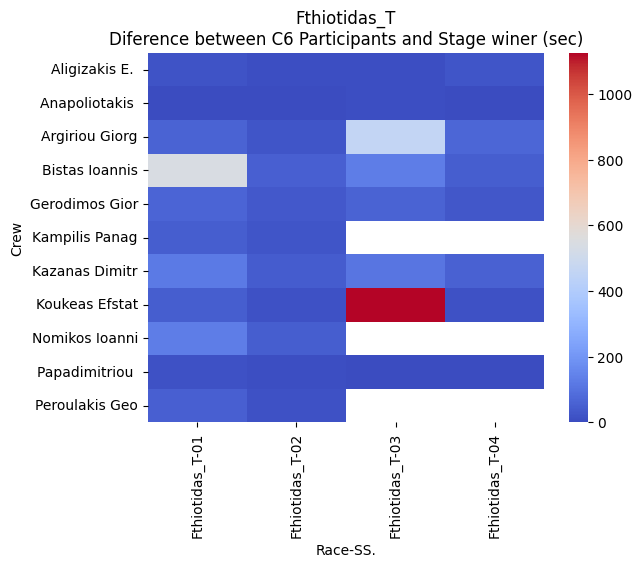

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

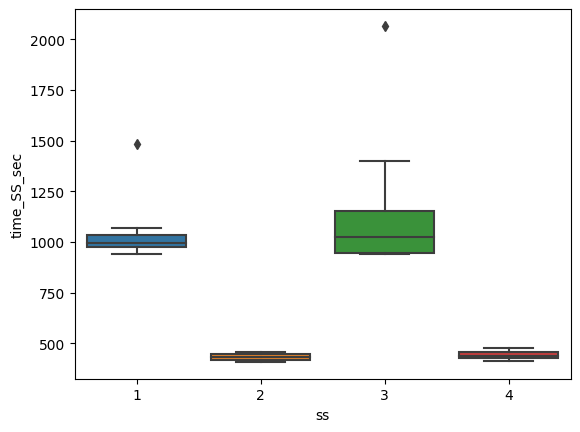

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

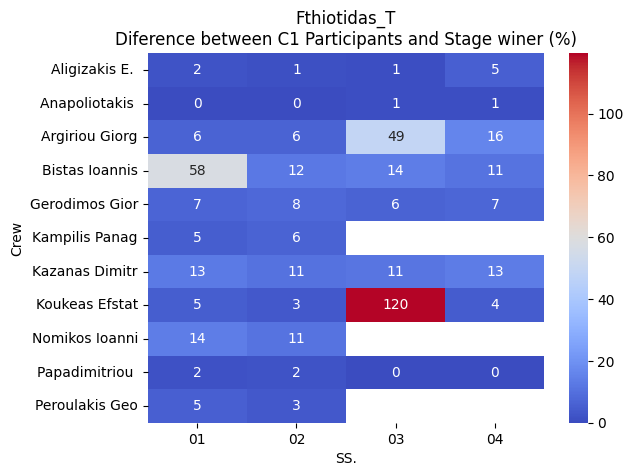

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")